In [156]:
#!pip install Tensorflow
#!pip install keras

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
X=data.drop("target",axis=1)
y=data["target"]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
X_train.shape

(227, 13)

In [164]:
X_test.shape

(76, 13)

In [9]:
scale=StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

## Adding layers

In [11]:
model = Sequential()
#input and first hidden layer
model.add(Dense(10,input_dim =13, activation='relu',kernel_initializer="uniform"))
# 10 implies number of nodes
# input_dim implies number of features / x in data
# activation implies which activation function is using
# kernel_intializer imples weight initialization, by default itis uniform

#second hidden layer
model.add(Dense(15,activation="relu",kernel_initializer="uniform"))

#third layer
model.add(Dense(14,activation="relu",kernel_initializer="uniform"))

#fourth layer
model.add(Dense(16,activation="relu",kernel_initializer="uniform"))

#output layer
model.add(Dense(1,activation="sigmoid"))



C:\Users\apasi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate = .01),metrics=["accuracy"])
model.summary()

#param ==(features*hidden_layes)+hidden_layers

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 14)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 786 (3.07 KB)

 Trainable params: 786 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
training_history = model.fit(X_train_scaled,y_train,epochs=80,batch_size=10,
                             validation_data=(X_test_scaled,y_test))
training_history

## an epoch is a single itration over the entire dataset during the training process
## batch size is the number of training examples utilized in one iteration to update the models weights

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5544 - loss: 0.6928 - val_accuracy: 0.5395 - val_loss: 0.6924
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5322 - loss: 0.6926 - val_accuracy: 0.5395 - val_loss: 0.6917
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5770 - loss: 0.6901 - val_accuracy: 0.5395 - val_loss: 0.6913
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5226 - loss: 0.6925 - val_accuracy: 0.5395 - val_loss: 0.6910
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5272 - loss: 0.6920 - val_accuracy: 0.5395 - val_loss: 0.6906
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5385 - loss: 0.6908 - val_accuracy: 0.5395 - val_loss: 0.6905
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5386 - loss: 0.6906 - val_accuracy: 0.5395 - val_loss: 0.6903
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5835 - loss: 0.6856 - val_accuracy: 0.5395 - val_loss

In [14]:
hist = training_history.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [15]:
hist["val_accuracy"][-1]

0.5394737124443054

Text(0, 0.5, 'Loss')

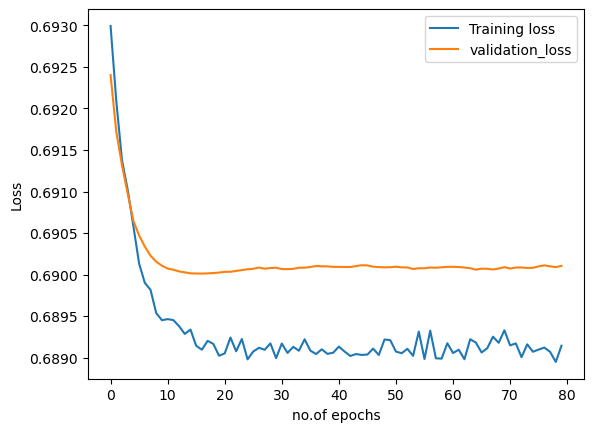

In [16]:
plt.plot(hist["loss"],label="Training loss")
plt.plot(hist["val_loss"],label="validation_loss")
plt.legend()
plt.xlabel("no.of epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

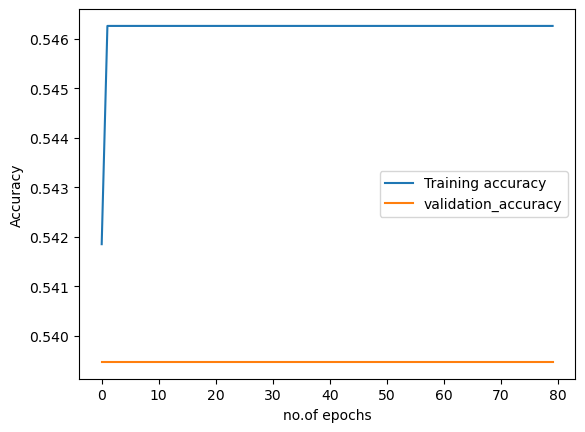

In [17]:
plt.plot(hist["accuracy"],label="Training accuracy")
plt.plot(hist["val_accuracy"],label="validation_accuracy")
plt.legend()
plt.xlabel("no.of epochs")
plt.ylabel("Accuracy")

In [18]:
y_pred = model.predict(X_test)
y_pred
#the values is btw 0 and 1 because activation funtion is sigmoid

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[0.5464407 ],
       [0.5464745 ],
       [0.54668415],
       [0.54555386],
       [0.5462394 ],
       [0.54655075],
       [0.5464511 ],
       [0.5465927 ],
       [0.5461955 ],
       [0.546334  ],
       [0.5465671 ],
       [0.5465524 ],
       [0.5461885 ],
       [0.5465224 ],
       [0.54640985],
       [0.5464699 ],
       [0.54643536],
       [0.5465143 ],
       [0.5462674 ],
       [0.5465829 ],
       [0.546606  ],
       [0.54624355],
       [0.5462645 ],
       [0.5464069 ],
       [0.5463759 ],
       [0.54653096],
       [0.5464877 ],
       [0.5464115 ],
       [0.5464582 ],
       [0.5463251 ],
       [0.5463389 ],
       [0.54654455],
       [0.5461893 ],
       [0.5464072 ],
       [0.5465549 ],
       [0.54640174],
       [0.5464064 ],
       [0.5463646 ],
       [0.5465415 ],
       [0.546319  ],
       [0.54647887],
       [0.5465052 ],
       [0.54650646],
       [0.54648244],
       [0.5463301 ],
       [0.5464072 ],
       [0.5465064 ],
       [0.546

In [19]:
y_pred_classses = (y_pred>.5).astype("int32")
y_pred_classses

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [175]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [176]:
int(model.predict(scale.transform([[37,1,2,130,250,0,1,187,0,3.5,0,0,2]]))>.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\apasi\AppData\Local\Temp\ipykernel_20496\3092166658.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(model.predict(scale.transform([[37,1,2,130,250,0,1,187,0,3.5,0,0,2]]))>.5)


1

In [177]:
print(classification_report(y_test,y_pred_classses))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.54      1.00      0.70        41

    accuracy                           0.54        76
   macro avg       0.27      0.50      0.35        76
weighted avg       0.29      0.54      0.38        76



C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
confusion_matrix(y_test,y_pred_classses)

array([[ 0, 35],
       [ 0, 41]], dtype=int64)

## Test2

In [179]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [180]:
view = df[df["stroke"]==0]
view

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [181]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [183]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [184]:
df["bmi"].unique

<bound method Series.unique of 0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64>

In [185]:
df["bmi"]=df["bmi"].fillna(df["bmi"].mean())

In [186]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [187]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [188]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [189]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [190]:
label = LabelEncoder()

In [191]:
df["gender"] = label.fit_transform(df["gender"])
df["ever_married"] = label.fit_transform(df["ever_married"])
df["work_type"] = label.fit_transform(df["work_type"])
df["Residence_type"] = label.fit_transform(df["Residence_type"])
df["smoking_status"] = label.fit_transform(df["smoking_status"])


In [192]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [193]:
df["gender"] = df["gender"].astype("int32")
df["ever_married"] = df["ever_married"].astype("int32")
df["work_type"] = df["work_type"].astype("int32")
df["Residence_type"] = df["Residence_type"].astype("int32")
df["smoking_status"] = df["smoking_status"].astype("int32")


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB


In [195]:
df.drop("id",axis=1,inplace=True)

In [216]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000,0.028123


In [217]:
import seaborn as sns

<Axes: >

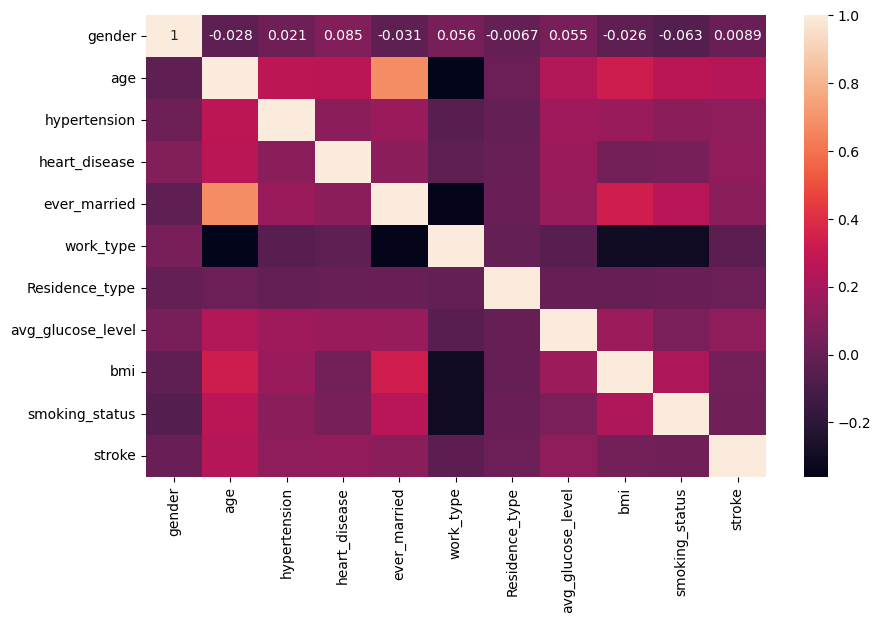

In [228]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [196]:
X=df.drop("stroke",axis=1)
y=df["stroke"]

In [197]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [198]:
X_train.shape

(3832, 10)

In [199]:
X_test.shape

(1278, 10)

In [200]:
scale = StandardScaler()

In [201]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [202]:
model = Sequential()
model.add(Dense(12,input_dim=10,activation='relu',kernel_initializer="uniform"))
model.add(Dense(14,activation='relu',kernel_initializer="uniform"))
model.add(Dense(15,activation="relu",kernel_initializer="uniform"))
model.add(Dense(16,activation="relu",kernel_initializer="uniform"))
model.add(Dense(1,activation="sigmoid"))

C:\Users\apasi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [203]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=.01),metrics=["accuracy"])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 14)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 15)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 812 (3.17 KB)

 Trainable params: 812 (3.17 KB)

 Non-trainable params: 0 (0.00 B)

In [204]:
training_history = model.fit(X_train_scaled,y_train,epochs=70,batch_size=12,validation_data=(X_test_scaled,y_test))
training_history

Epoch 1/70
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9564 - loss: 0.5002 - val_accuracy: 0.9374 - val_loss: 0.2716
Epoch 2/70
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9533 - loss: 0.2250 - val_accuracy: 0.9374 - val_loss: 0.2359
Epoch 3/70
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9580 - loss: 0.1821 - val_accuracy: 0.9374 - val_loss: 0.2342
Epoch 4/70
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9544 - loss: 0.1865 - val_accuracy: 0.9374 - val_loss: 0.2355
Epoch 5/70
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9495 - loss: 0.2001 - val_accuracy: 0.9374 - val_loss: 0.2368
Epoch 6/70
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9547 - loss: 0.1844 - val_accuracy: 0.9374 - val_loss: 0.2375
Epoch 7/70
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9542 - loss: 0.1861 - val_accuracy: 0.9374 - val_loss: 0.2374
Epoch 8/70
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9521 - loss: 0.1926 - val_accuracy: 0.

In [205]:
hist = training_history.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [206]:
hist["val_accuracy"][-1]

0.9374021887779236

Text(0, 0.5, 'Loss')

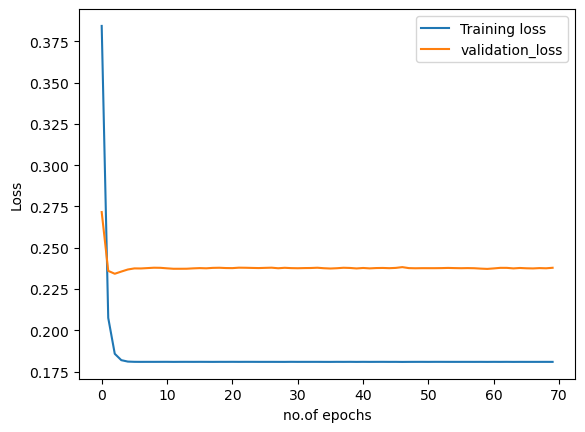

In [207]:
plt.plot(hist["loss"],label="Training loss")
plt.plot(hist["val_loss"],label="validation_loss")
plt.legend()
plt.xlabel("no.of epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

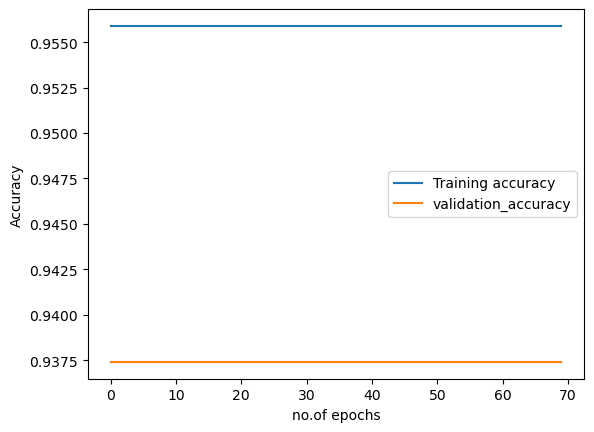

In [208]:
plt.plot(hist["accuracy"],label="Training accuracy")
plt.plot(hist["val_accuracy"],label="validation_accuracy")
plt.legend()
plt.xlabel("no.of epochs")
plt.ylabel("Accuracy")

In [209]:
y_pred = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [210]:
y_pred_classses = (y_pred>.5).astype("int32")
y_pred_classses

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [211]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [230]:
int(model.predict(scale.transform([[1,100,0,1,1,2,1,2280,306,1]]))>0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\apasi\AppData\Local\Temp\ipykernel_20496\650798002.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(model.predict(scale.transform([[1,100,0,1,1,2,1,2280,306,1]]))>0.5)


0

In [213]:
print(classification_report(y_test,y_pred_classses))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
confusion_matrix(y_test,y_pred_classses)

array([[1198,    0],
       [  80,    0]], dtype=int64)